# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier, EasyEnsembleClassifier, RUSBoostClassifier
from imblearn.over_sampling import SMOTE, ADASYN
import optuna
import joblib

In [2]:
warnings.filterwarnings('ignore')

In [3]:
medical_df = pd.read_csv("diabetes_prediction_dataset.csv")

In [4]:
medical_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
medical_df.shape

(100000, 9)

In [7]:
medical_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# Data Visualization

The following visualizations provide insights into the distribution of various features and their relationship with diabetes status.

In [9]:
medical_df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

### Gender Distribution

This bar plot shows the distribution of individuals across different genders in the dataset.

<BarContainer object of 3 artists>

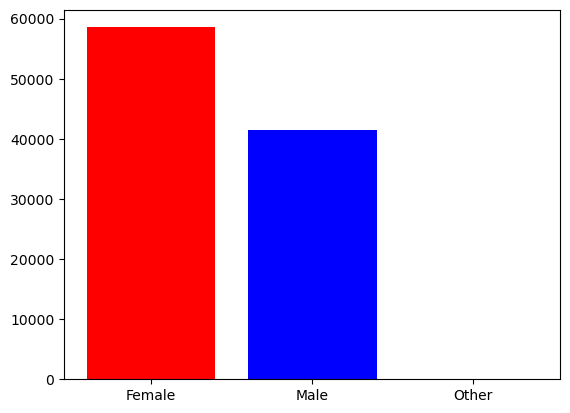

In [10]:
plt.bar(x=medical_df["gender"].unique().tolist(), height=medical_df["gender"].value_counts().values, color=["red", "blue", "green"])

### Diabetes Distribution by Gender

This bar plot compares the number of diabetic and non-diabetic individuals within each gender category, highlighting potential differences in diabetes prevalence across genders.

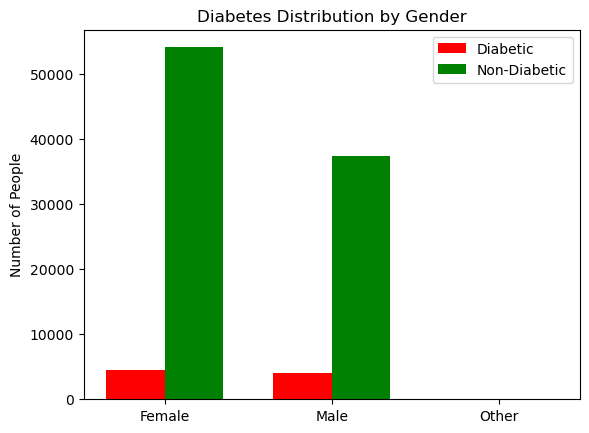

In [11]:
genders = medical_df["gender"].unique().tolist()
diabetic_counts = [medical_df[(medical_df["gender"] == gender) & (medical_df["diabetes"] == 1)].shape[0] for gender in genders]
non_diabetic_counts = [medical_df[(medical_df["gender"] == gender) & (medical_df["diabetes"] == 0)].shape[0] for gender in genders]
x = np.arange(len(genders)) 
width = 0.35  
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, diabetic_counts, width, label='Diabetic', color='red')
bars2 = ax.bar(x + width/2, non_diabetic_counts, width, label='Non-Diabetic', color='green')
ax.set_ylabel('Number of People')
ax.set_title('Diabetes Distribution by Gender')
ax.set_xticks(x)
ax.set_xticklabels(genders)
ax.legend()

### Overall Diabetes Distribution

This pie chart shows the overall percentage of diabetic and non-diabetic individuals in the dataset, indicating the class imbalance.

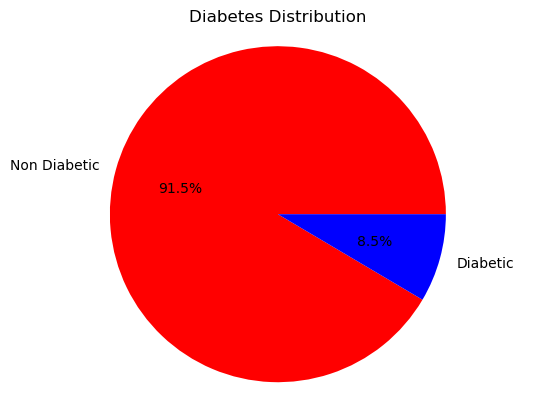

In [12]:
plt.pie(medical_df["diabetes"].value_counts().values, labels=["Non Diabetic", "Diabetic"], colors=["red", "blue"], autopct='%1.1f%%')
plt.title("Diabetes Distribution")
plt.axis('equal')
plt.show()

### BMI Distribution

These plots (boxplot and distribution plot) show the distribution of Body Mass Index (BMI) in the dataset, helping to identify the range and concentration of BMI values.

Text(0, 0.5, 'Number of People')

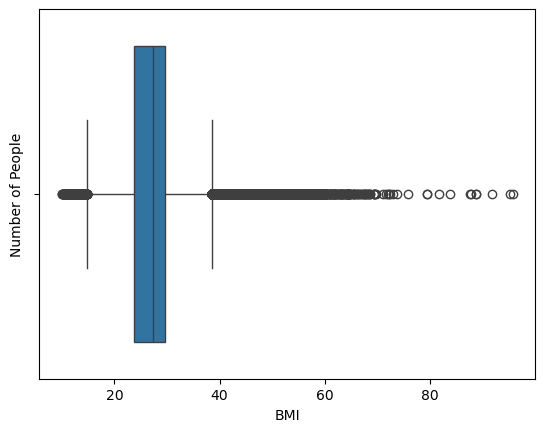

In [13]:
sns.boxplot(data=medical_df, x="bmi")
plt.xlabel("BMI")
plt.ylabel("Number of People")

Text(-12.805555555555555, 0.5, 'Number of People')

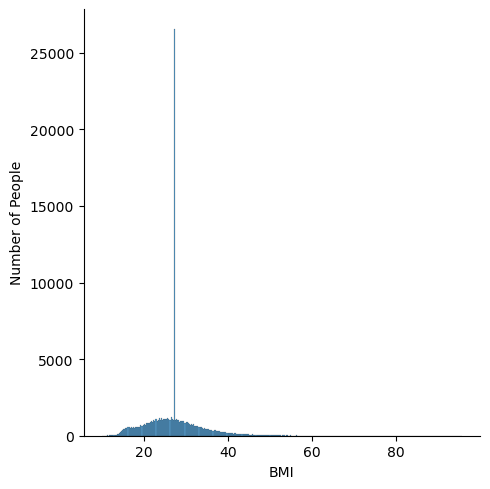

In [14]:
sns.displot(data=medical_df, x="bmi")
plt.xlabel("BMI")
plt.ylabel("Number of People")

### BMI Distribution by Diabetes Status

These plots (boxplot and histogram) illustrate the distribution of BMI for both diabetic and non-diabetic individuals, revealing whether BMI is a distinguishing factor for diabetes.

Text(0, 0.5, 'BMI')

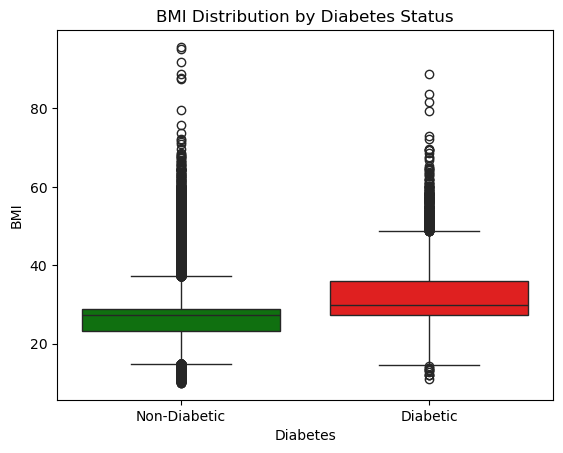

In [15]:
sns.boxplot(x="diabetes", y="bmi", data=medical_df, palette=["green", "red"])
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("Diabetes")
plt.ylabel("BMI")

Text(0, 0.5, 'Count')

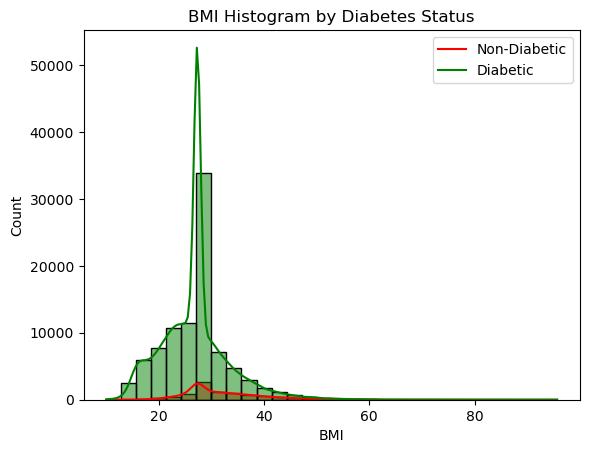

In [16]:
sns.histplot(data=medical_df, x="bmi", hue="diabetes", kde=True, palette=["green", "red"], bins=30)
plt.legend(labels=["Non-Diabetic", "Diabetic"])
plt.title("BMI Histogram by Diabetes Status")
plt.xlabel("BMI")
plt.ylabel("Count")

### Blood Glucose Level Distribution

These plots (boxplot and distribution plot) show the distribution of blood glucose levels in the dataset.

Text(0, 0.5, 'Number of People')

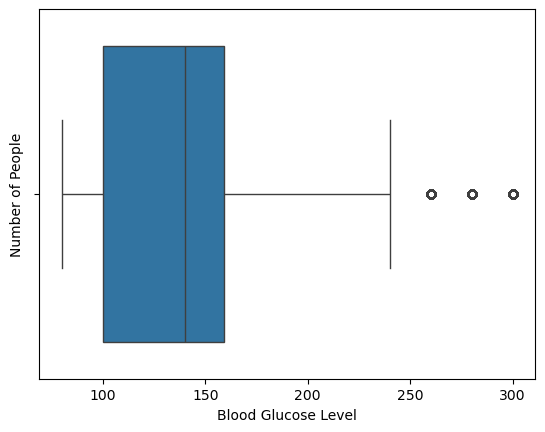

In [17]:
sns.boxplot(data=medical_df, x="blood_glucose_level")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Number of People")

Text(-12.805555555555555, 0.5, 'Number of People')

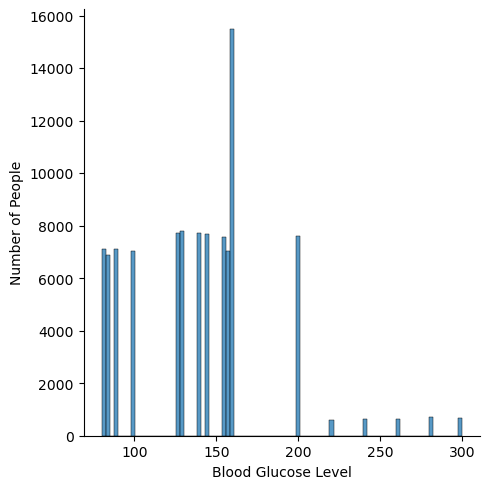

In [18]:
sns.displot(data=medical_df, x="blood_glucose_level")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Number of People")

### Blood Glucose Level Distribution by Diabetes Status

These plots (boxplot and histogram) compare the distribution of blood glucose levels between diabetic and non-diabetic individuals, indicating the relationship between blood glucose and diabetes.

Text(0, 0.5, 'Blood Glucose Level')

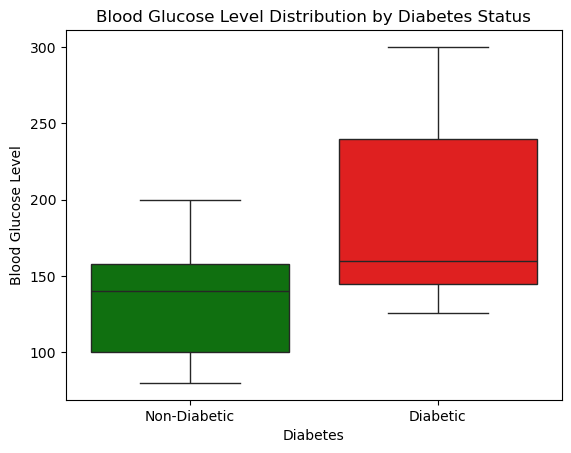

In [19]:
sns.boxplot(x="diabetes", y="blood_glucose_level", data=medical_df, palette=["green", "red"])
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])
plt.title("Blood Glucose Level Distribution by Diabetes Status")
plt.xlabel("Diabetes")
plt.ylabel("Blood Glucose Level")

Text(0, 0.5, 'Number of People')

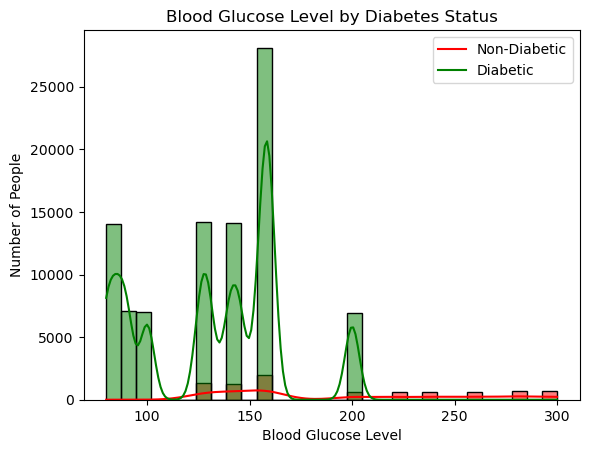

In [20]:
sns.histplot(data=medical_df, x="blood_glucose_level", hue="diabetes", kde=True, palette=["green", "red"], bins=30)
plt.legend(labels=["Non-Diabetic", "Diabetic"])
plt.title("Blood Glucose Level by Diabetes Status")
plt.xlabel("Blood Glucose Level")
plt.ylabel("Number of People")

### Diabetes Distribution by Hypertension

This bar plot shows the distribution of diabetic and non-diabetic individuals based on their hypertension status.

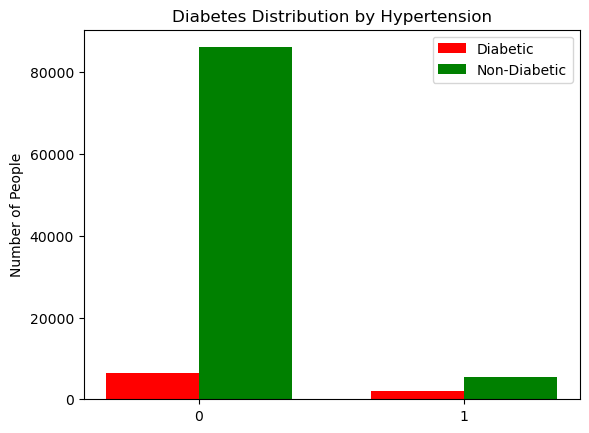

In [21]:
hypertension_vals = medical_df["hypertension"].unique().tolist()
diabetic_counts = [medical_df[(medical_df["hypertension"] == val) & (medical_df["diabetes"] == 1)].shape[0] for val in hypertension_vals]
non_diabetic_counts = [medical_df[(medical_df["hypertension"] == val) & (medical_df["diabetes"] == 0)].shape[0] for val in hypertension_vals]
x = np.arange(len(hypertension_vals)) 
width = 0.35  
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, diabetic_counts, width, label='Diabetic', color='red')
bars2 = ax.bar(x + width/2, non_diabetic_counts, width, label='Non-Diabetic', color='green')
ax.set_ylabel('Number of People')
ax.set_title('Diabetes Distribution by Hypertension')
ax.set_xticks(x)
ax.set_xticklabels(hypertension_vals)
ax.legend()

### Hemoglobin A1c Level Distribution

These plots (boxplot and distribution plot) show the distribution of Hemoglobin A1c levels in the dataset.

Text(0, 0.5, 'Number of People')

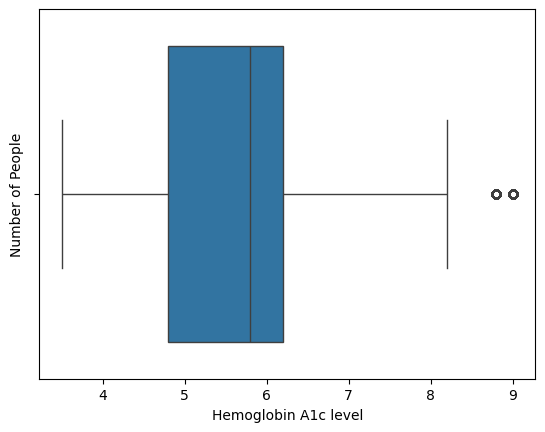

In [22]:
sns.boxplot(data=medical_df, x="HbA1c_level")
plt.xlabel("Hemoglobin A1c level")
plt.ylabel("Number of People")

Text(-3.9305555555555554, 0.5, 'Number of People')

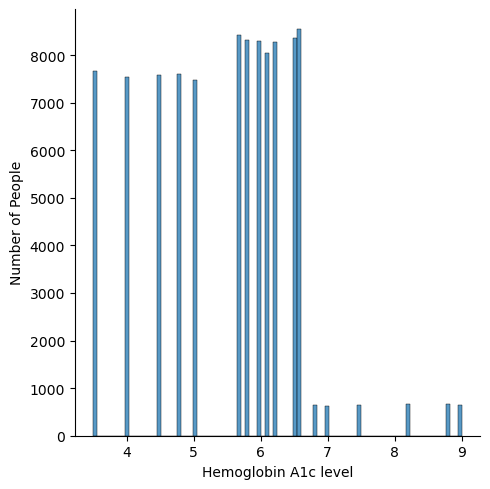

In [23]:
sns.displot(data=medical_df, x="HbA1c_level")
plt.xlabel("Hemoglobin A1c level")
plt.ylabel("Number of People")

### Hemoglobin A1c Level Distribution by Diabetes Status

These plots (boxplot and histogram) compare the distribution of Hemoglobin A1c levels between diabetic and non-diabetic individuals, highlighting its potential as a predictor for diabetes.

Text(0, 0.5, 'Hemoglobin A1c level')

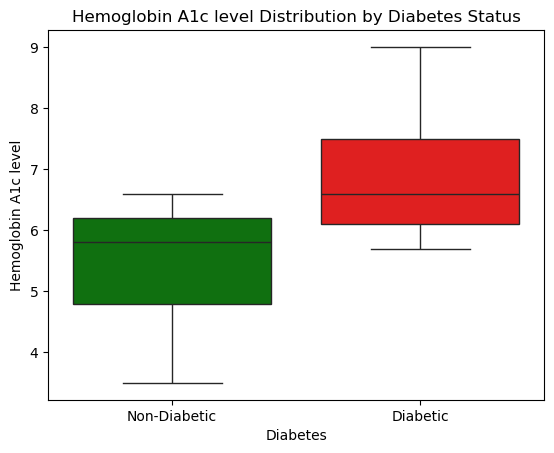

In [24]:
sns.boxplot(x="diabetes", y="HbA1c_level", data=medical_df, palette=["green", "red"])
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])
plt.title("Hemoglobin A1c level Distribution by Diabetes Status")
plt.xlabel("Diabetes")
plt.ylabel("Hemoglobin A1c level")

Text(0, 0.5, 'Number of People')

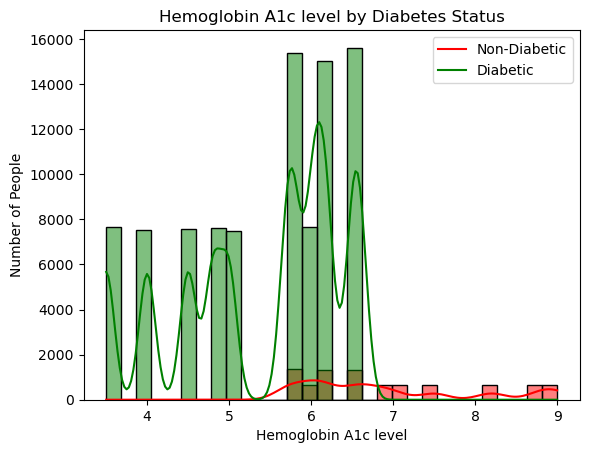

In [25]:
sns.histplot(data=medical_df, x="HbA1c_level", hue="diabetes", kde=True, palette=["green", "red"], bins=30)
plt.legend(labels=["Non-Diabetic", "Diabetic"])
plt.title("Hemoglobin A1c level by Diabetes Status")
plt.xlabel("Hemoglobin A1c level")
plt.ylabel("Number of People")

### Diabetes Distribution by Heart Disease

This bar plot shows the distribution of diabetic and non-diabetic individuals based on their heart disease status.

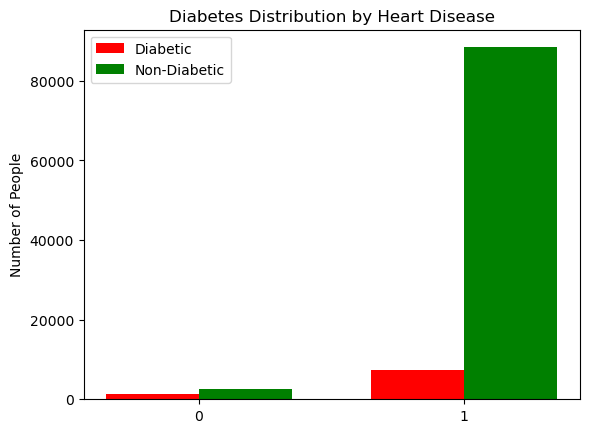

In [176]:
heart_disease = medical_df["heart_disease"].unique().tolist()
diabetic_counts = [medical_df[(medical_df["heart_disease"] == val) & (medical_df["diabetes"] == 1)].shape[0] for val in heart_disease]
non_diabetic_counts = [medical_df[(medical_df["heart_disease"] == val) & (medical_df["diabetes"] == 0)].shape[0] for val in heart_disease]
x = np.arange(len(heart_disease)) 
width = 0.35  
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, diabetic_counts, width, label='Diabetic', color='red')
bars2 = ax.bar(x + width/2, non_diabetic_counts, width, label='Non-Diabetic', color='green')
ax.set_ylabel('Number of People')
ax.set_title('Diabetes Distribution by Heart Disease')
ax.set_xticks(x)
ax.set_xticklabels(hypertension_vals)
ax.legend()

### Age Distribution

These plots (boxplot and distribution plot) show the distribution of age in the dataset.

Text(0, 0.5, 'Number of People')

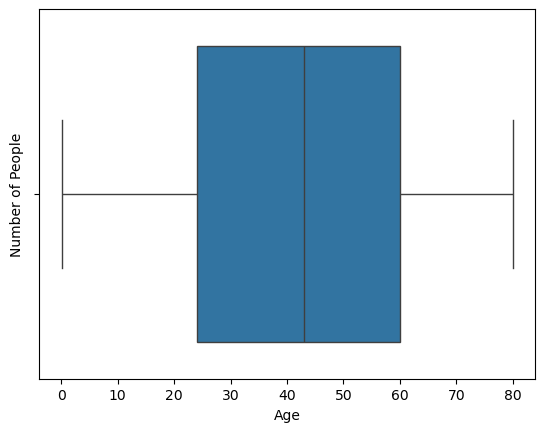

In [27]:
sns.boxplot(data=medical_df, x="age")
plt.xlabel("Age")
plt.ylabel("Number of People")

Text(-3.9305555555555554, 0.5, 'Number of People')

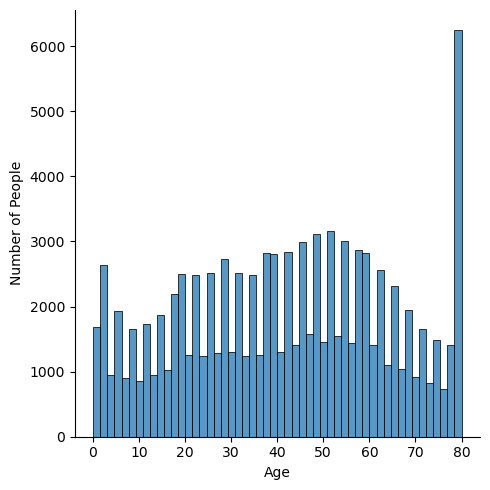

In [28]:
sns.displot(data=medical_df, x="age")
plt.xlabel("Age")
plt.ylabel("Number of People")

### Age Distribution by Diabetes Status

These plots (boxplot and histogram) compare the distribution of age between diabetic and non-diabetic individuals, showing how age relates to diabetes prevalence.

Text(0, 0.5, 'Age')

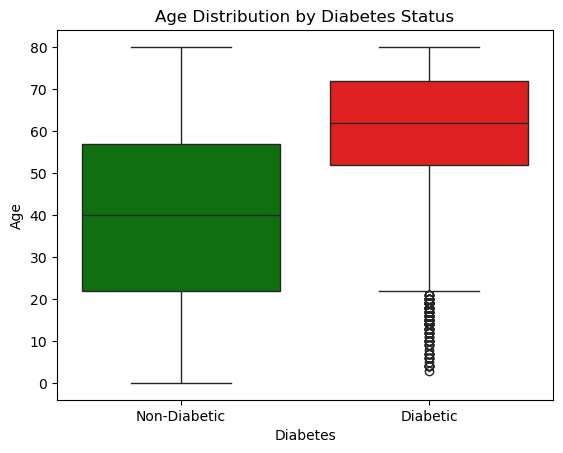

In [29]:
sns.boxplot(x="diabetes", y="age", data=medical_df, palette=["green", "red"])
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])
plt.title("Age Distribution by Diabetes Status")
plt.xlabel("Diabetes")
plt.ylabel("Age")

Text(0, 0.5, 'Number of People')

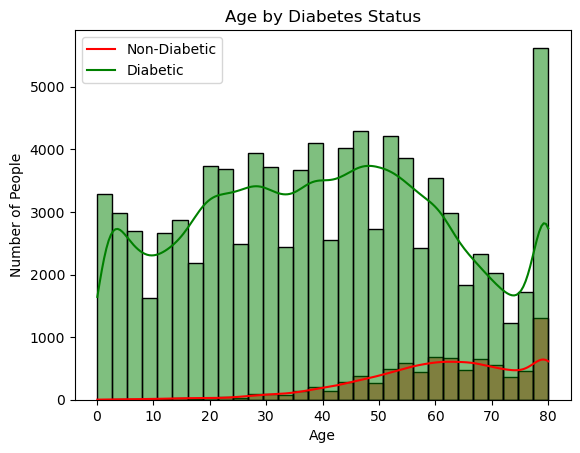

In [30]:
sns.histplot(data=medical_df, x="age", hue="diabetes", kde=True, palette=["green", "red"], bins=30)
plt.legend(labels=["Non-Diabetic", "Diabetic"])
plt.title("Age by Diabetes Status")
plt.xlabel("Age")
plt.ylabel("Number of People")

### Smoking History Distribution

This pie chart shows the distribution of different smoking history categories in the dataset.

([<matplotlib.patches.Wedge at 0x1c63b6ca750>,
 [Text(0.47410281605893917, 0.9925857745328531, 'never'),
  Text(-1.0755269524262505, -0.23074179206355794, 'No Info'),
  Text(0.04056127539280973, -1.0992519196883437, 'current'),
  Text(0.6412964508955795, -0.8937219154013925, 'former'),
  Text(0.9885134629505677, -0.4825361474184878, 'ever'),
  Text(1.0913088309943104, -0.13800375137593823, 'not current')],
 [Text(0.2586015360321486, 0.5414104224724653, '35.8%'),
  Text(-0.5866510649597729, -0.12585915930739522, '35.1%'),
  Text(0.02212433203244167, -0.5995919561936419, '9.4%'),
  Text(0.34979806412486153, -0.48748468112803217, '9.3%'),
  Text(0.5391891616094006, -0.2632015349555388, '6.4%'),
  Text(0.5952593623605329, -0.07527477347778448, '4.0%')])

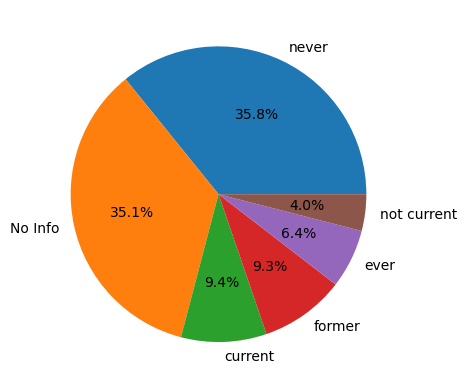

In [31]:
plt.pie(medical_df["smoking_history"].value_counts().values, labels=medical_df["smoking_history"].unique().tolist(),  autopct='%1.1f%%')

# Feature Engineering

In [33]:
temp_df = medical_df.copy(deep=True)

In [34]:
medical_df = temp_df

In [35]:
def classifyBMI(bmi):
    if bmi < 18.50:
        return "Underweight"
    elif bmi >= 18.50 and bmi <= 24.99:
        return "Normal"
    elif bmi >= 25 and bmi <= 29.99:
        return "Overweight"
    else:
        return "Obese"

medical_df["BMI_Category"] = medical_df["bmi"].apply(classifyBMI)

In [36]:
medical_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,BMI_Category
0,Female,80.0,0,1,never,25.19,6.6,140,0,Overweight
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,Overweight
2,Male,28.0,0,0,never,27.32,5.7,158,0,Overweight
3,Female,36.0,0,0,current,23.45,5.0,155,0,Normal
4,Male,76.0,1,1,current,20.14,4.8,155,0,Normal


In [37]:
gender_encoder = OneHotEncoder(sparse_output=False)
gender_encoded = gender_encoder.fit_transform(medical_df["gender"].values.reshape(-1, 1))
encoded_df = pd.DataFrame(gender_encoded, columns=gender_encoder.get_feature_names_out(["gender"]))
encoded_df.index = medical_df.index 
medical_df = pd.concat([medical_df.drop(columns=["gender"]), encoded_df], axis=1)

In [38]:
medical_df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,BMI_Category,gender_Female,gender_Male,gender_Other
0,80.0,0,1,never,25.19,6.6,140,0,Overweight,1.0,0.0,0.0
1,54.0,0,0,No Info,27.32,6.6,80,0,Overweight,1.0,0.0,0.0
2,28.0,0,0,never,27.32,5.7,158,0,Overweight,0.0,1.0,0.0
3,36.0,0,0,current,23.45,5.0,155,0,Normal,1.0,0.0,0.0
4,76.0,1,1,current,20.14,4.8,155,0,Normal,0.0,1.0,0.0


In [39]:
medical_df.isnull().sum()

age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
BMI_Category           0
gender_Female          0
gender_Male            0
gender_Other           0
dtype: int64

In [40]:
bmi_encoder = OneHotEncoder(sparse_output=False)
bmi_encoded = bmi_encoder.fit_transform(medical_df["BMI_Category"].values.reshape(-1, 1))
encoded_df = pd.DataFrame(bmi_encoded, columns=bmi_encoder.get_feature_names_out(["BMI_Category"]))
encoded_df.index = medical_df.index
medical_df = pd.concat([medical_df.drop(columns=["BMI_Category"]), encoded_df], axis=1)

In [41]:
medical_df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,BMI_Category_Normal,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight
0,80.0,0,1,never,25.19,6.6,140,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0,0,No Info,27.32,6.6,80,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28.0,0,0,never,27.32,5.7,158,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0,0,current,23.45,5.0,155,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,76.0,1,1,current,20.14,4.8,155,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [42]:
medical_df.isnull().sum()

age                         0
hypertension                0
heart_disease               0
smoking_history             0
bmi                         0
HbA1c_level                 0
blood_glucose_level         0
diabetes                    0
gender_Female               0
gender_Male                 0
gender_Other                0
BMI_Category_Normal         0
BMI_Category_Obese          0
BMI_Category_Overweight     0
BMI_Category_Underweight    0
dtype: int64

In [43]:
medical_df.age.unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

In [44]:
medical_df.age = medical_df.age.round().astype(int)

In [45]:
medical_df.age.unique()

array([80, 54, 28, 36, 76, 20, 44, 79, 42, 32, 53, 78, 67, 15, 37, 40,  5,
       69, 72,  4, 30, 45, 43, 50, 41, 26, 34, 73, 77, 66, 29, 60, 38,  3,
       57, 74, 19, 46, 21, 59, 27, 13, 56,  2,  7, 11,  6, 55,  9, 62, 47,
       12, 68, 75, 22, 58, 18, 24, 17, 25,  0, 33, 16, 61, 31,  8, 49, 39,
       65, 14, 70,  1, 48, 51, 71, 64, 63, 52, 10, 35, 23])

In [46]:
medical_df.shape

(100000, 15)

In [47]:
medical_df = medical_df[medical_df["age"] != 0]

In [48]:
medical_df.shape

(99580, 15)

In [49]:
medical_df.isnull().sum()

age                         0
hypertension                0
heart_disease               0
smoking_history             0
bmi                         0
HbA1c_level                 0
blood_glucose_level         0
diabetes                    0
gender_Female               0
gender_Male                 0
gender_Other                0
BMI_Category_Normal         0
BMI_Category_Obese          0
BMI_Category_Overweight     0
BMI_Category_Underweight    0
dtype: int64

In [50]:
medical_df.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [51]:
def classifySmokers(history):
    if history == "ever" or history == "not current":
        return "Infrequent"
    elif history == "never":
        return "Never"
    elif history == "current":
        return "Current"
    elif history == "former":
        return "Ex-Smoker"
    elif history == "No Info":
        return "No Info"

medical_df["smoking_history"] = medical_df["smoking_history"].apply(classifySmokers)

In [52]:
medical_df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,BMI_Category_Normal,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight
0,80,0,1,Never,25.19,6.6,140,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54,0,0,No Info,27.32,6.6,80,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,0,0,Never,27.32,5.7,158,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,36,0,0,Current,23.45,5.0,155,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,76,1,1,Current,20.14,4.8,155,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [53]:
medical_df.isnull().sum()

age                         0
hypertension                0
heart_disease               0
smoking_history             0
bmi                         0
HbA1c_level                 0
blood_glucose_level         0
diabetes                    0
gender_Female               0
gender_Male                 0
gender_Other                0
BMI_Category_Normal         0
BMI_Category_Obese          0
BMI_Category_Overweight     0
BMI_Category_Underweight    0
dtype: int64

In [54]:
numeric_cols = ["age", "HbA1c_level", "blood_glucose_level", "bmi"]
scaler = StandardScaler()
medical_df[numeric_cols] = scaler.fit_transform(medical_df[numeric_cols])

In [55]:
X = medical_df.drop(columns=["smoking_history"])
Y = medical_df["smoking_history"]

smoker_label_encoder = LabelEncoder()

train_indices = Y[Y != "No Info"].index
test_indices = Y[Y == "No Info"].index

X_train = X.loc[train_indices]
Y_train = smoker_label_encoder.fit_transform(Y.loc[train_indices])

X_test = X.loc[test_indices]  

smoker_rf_cl = RandomForestClassifier()
smoker_rf_cl.fit(X_train, Y_train)

smoker_information = smoker_rf_cl.predict(X_test)
predicted_labels = smoker_label_encoder.inverse_transform(smoker_information)

medical_df.loc[test_indices, "smoking_history"] = predicted_labels

In [56]:
medical_df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,BMI_Category_Normal,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight
0,1.693709,0,1,Never,-0.329314,1.000715,0.047134,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.532948,0,0,Never,-0.007003,1.000715,-1.425861,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.627813,0,0,Never,-0.007003,0.160206,0.489032,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.270656,0,0,Current,-0.592610,-0.493523,0.415382,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.515130,1,1,Current,-1.093478,-0.680302,0.415382,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [57]:
medical_df.isnull().sum()

age                         0
hypertension                0
heart_disease               0
smoking_history             0
bmi                         0
HbA1c_level                 0
blood_glucose_level         0
diabetes                    0
gender_Female               0
gender_Male                 0
gender_Other                0
BMI_Category_Normal         0
BMI_Category_Obese          0
BMI_Category_Overweight     0
BMI_Category_Underweight    0
dtype: int64

In [58]:
medical_df.smoking_history.unique()

array(['Never', 'Current', 'Ex-Smoker', 'Infrequent'], dtype=object)

In [59]:
temp_df2 = medical_df.copy()

In [60]:
smoker_encoder = OneHotEncoder(sparse_output=False)
smoker_encoded = smoker_encoder.fit_transform(medical_df["smoking_history"].values.reshape(-1, 1))
encoded_df = pd.DataFrame(smoker_encoded, columns=smoker_encoder.get_feature_names_out(["smoking_history"]))
encoded_df.index = medical_df.index 
medical_df = pd.concat([medical_df.drop(columns=["smoking_history"]), encoded_df], axis=1)

In [61]:
medical_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,BMI_Category_Normal,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight,smoking_history_Current,smoking_history_Ex-Smoker,smoking_history_Infrequent,smoking_history_Never
0,1.693709,0,1,-0.329314,1.000715,0.047134,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.532948,0,0,-0.007003,1.000715,-1.425861,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.627813,0,0,-0.007003,0.160206,0.489032,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.270656,0,0,-0.592610,-0.493523,0.415382,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.515130,1,1,-1.093478,-0.680302,0.415382,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

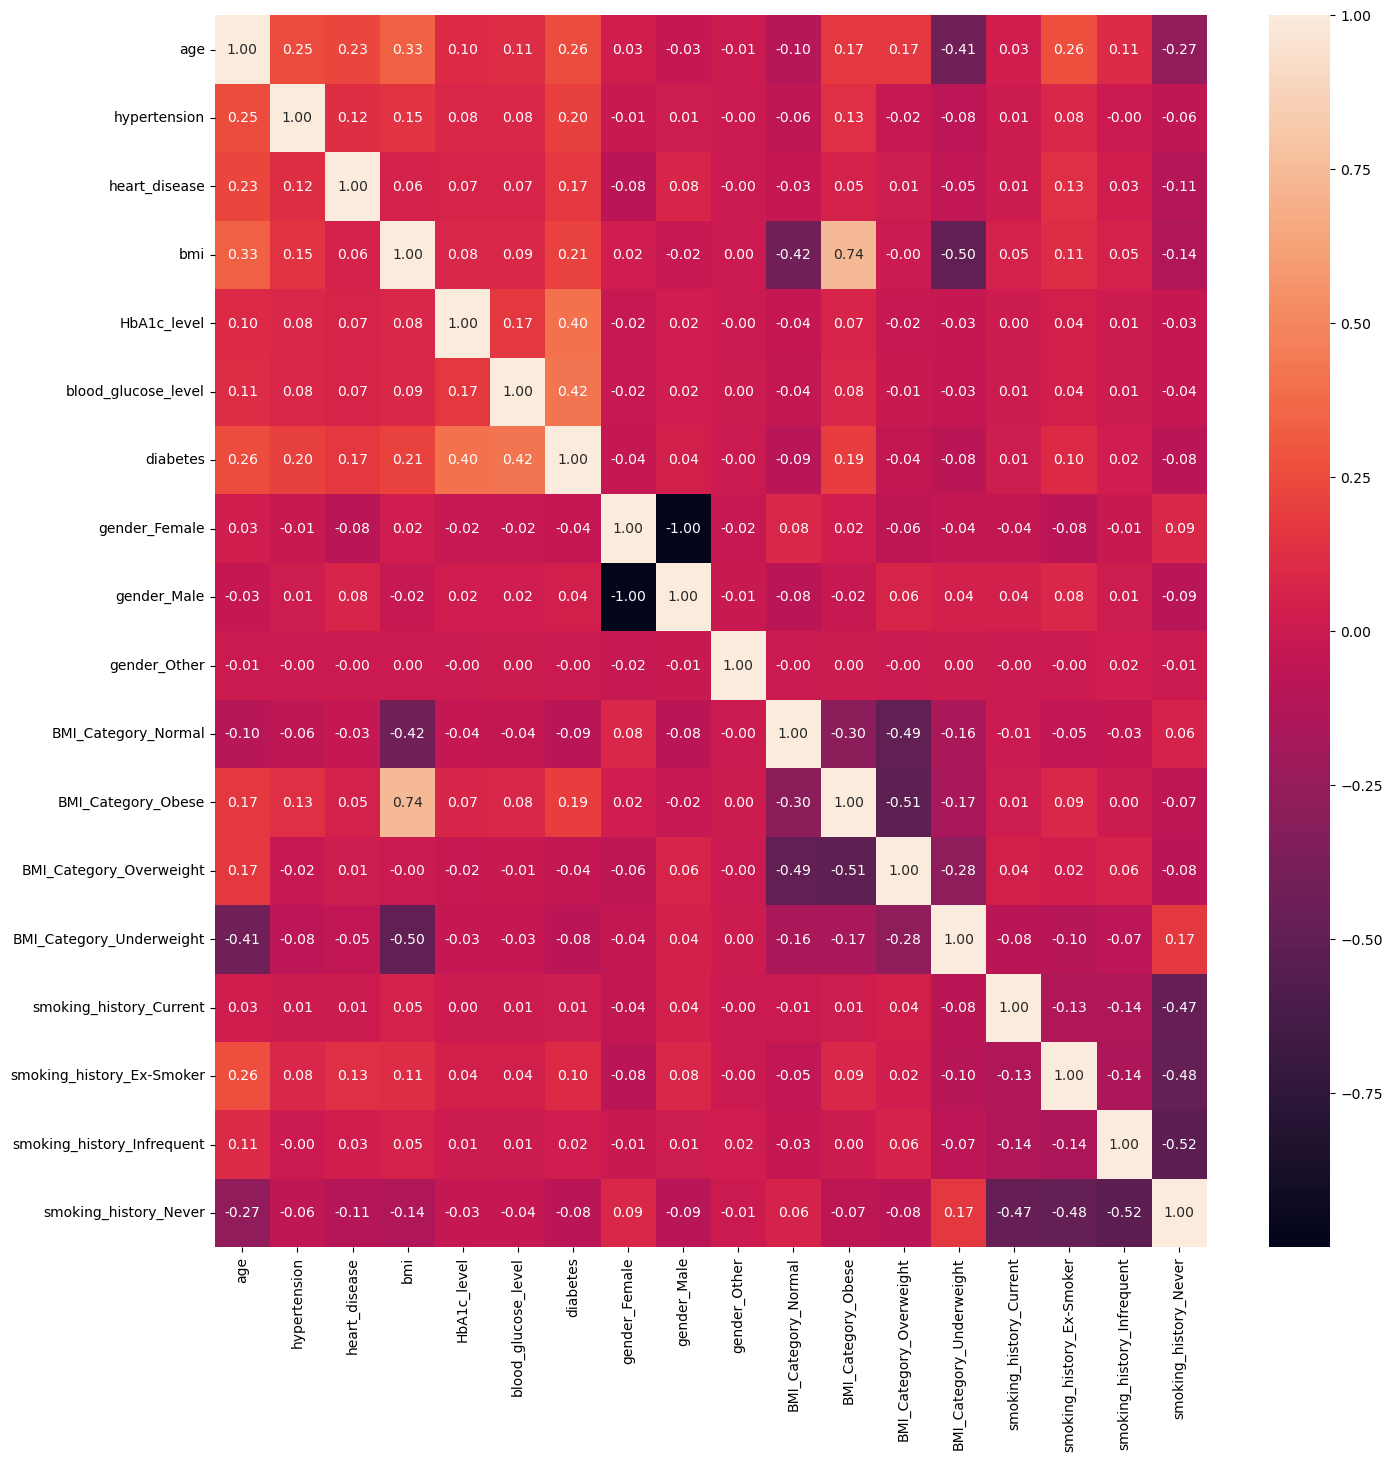

In [62]:
corr = medical_df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, fmt=".2f" , annot=True)

# Splitting Data

In [64]:
medical_df.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'gender_Other', 'BMI_Category_Normal', 'BMI_Category_Obese',
       'BMI_Category_Overweight', 'BMI_Category_Underweight',
       'smoking_history_Current', 'smoking_history_Ex-Smoker',
       'smoking_history_Infrequent', 'smoking_history_Never'],
      dtype='object')

In [65]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99580 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         99580 non-null  float64
 1   hypertension                99580 non-null  int64  
 2   heart_disease               99580 non-null  int64  
 3   bmi                         99580 non-null  float64
 4   HbA1c_level                 99580 non-null  float64
 5   blood_glucose_level         99580 non-null  float64
 6   diabetes                    99580 non-null  int64  
 7   gender_Female               99580 non-null  float64
 8   gender_Male                 99580 non-null  float64
 9   gender_Other                99580 non-null  float64
 10  BMI_Category_Normal         99580 non-null  float64
 11  BMI_Category_Obese          99580 non-null  float64
 12  BMI_Category_Overweight     99580 non-null  float64
 13  BMI_Category_Underweight    99580 no

In [66]:
medical_df.isnull().sum()

age                           0
hypertension                  0
heart_disease                 0
bmi                           0
HbA1c_level                   0
blood_glucose_level           0
diabetes                      0
gender_Female                 0
gender_Male                   0
gender_Other                  0
BMI_Category_Normal           0
BMI_Category_Obese            0
BMI_Category_Overweight       0
BMI_Category_Underweight      0
smoking_history_Current       0
smoking_history_Ex-Smoker     0
smoking_history_Infrequent    0
smoking_history_Never         0
dtype: int64

In [67]:
X = medical_df.drop(columns=["diabetes"])
Y = medical_df["diabetes"]

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

## Model Training

## Model Results Explanation

Below are the results from various classification models trained to predict diabetes. The metrics presented (Precision, Recall, F1-Score, and Accuracy) evaluate the performance of each model.

- **Precision**: The ability of the classifier not to label as positive a sample that is negative. High precision means a low false positive rate.
- **Recall**: The ability of the classifier to find all the positive samples. High recall means a low false negative rate.
- **F1-Score**: The harmonic mean of precision and recall. It's a good measure for imbalanced datasets.
- **Accuracy**: The ratio of correctly predicted instances to the total instances.

Given the class imbalance observed in the data (more non-diabetic than diabetic individuals), the F1-score and Recall are particularly important metrics to consider, as high accuracy can be misleading if the model simply predicts the majority class.

Let's look at the performance of each model:

## Random Forest Classifier

### Random Forest Classifier Results

The Random Forest model shows high overall accuracy. The precision for the diabetic class (1) is high, indicating a low rate of false positives. However, the recall is lower, suggesting the model is missing a significant number of actual diabetic cases. The F1-score provides a balanced measure of precision and recall.

In [71]:
rf_clr = RandomForestClassifier(random_state=42)
rf_clr.fit(X_train, Y_train)
Y_pred = rf_clr.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18221
           1       0.94      0.69      0.80      1695

    accuracy                           0.97     19916
   macro avg       0.96      0.84      0.89     19916
weighted avg       0.97      0.97      0.97     19916

Accuracy Score:  0.9698734685679855
Precision Score:  0.9440389294403893
Recall Score:  0.6867256637168142
F1 Score:  0.7950819672131147


## XG Boost Classifier

### XGBoost Classifier Results

The XGBoost model also demonstrates high accuracy and a high precision for the diabetic class. Similar to Random Forest, the recall is lower, indicating some false negatives. The F1-score is slightly higher than Random Forest, suggesting a marginally better balance between precision and recall for the diabetic class.

In [73]:
xg_clr = XGBClassifier(random_state=42)
xg_clr.fit(X_train, Y_train)
Y_pred = xg_clr.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18221
           1       0.96      0.69      0.80      1695

    accuracy                           0.97     19916
   macro avg       0.97      0.84      0.89     19916
weighted avg       0.97      0.97      0.97     19916

Accuracy Score:  0.9713295842538663
Precision Score:  0.9614121510673235
Recall Score:  0.6908554572271386
F1 Score:  0.8039821489872983


## Ada Boost Classifier

### Ada Boost Classifier Results

The Ada Boost model achieves high accuracy and the highest precision among the initial models for the diabetic class. The recall is comparable to Random Forest and XGBoost. The F1-score is similar to XGBoost.

In [75]:
ab_clr = AdaBoostClassifier(random_state=42)
ab_clr.fit(X_train, Y_train)
Y_pred = ab_clr.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18221
           1       0.98      0.68      0.80      1695

    accuracy                           0.97     19916
   macro avg       0.97      0.84      0.89     19916
weighted avg       0.97      0.97      0.97     19916

Accuracy Score:  0.9715806386824664
Precision Score:  0.9763713080168777
Recall Score:  0.6825958702064897
F1 Score:  0.8034722222222224


## Logistic Regression

### Logistic Regression Results

The Logistic Regression model has a lower accuracy compared to the tree-based models. The precision and recall for the diabetic class are also lower, resulting in a lower F1-score.

lr = LogisticRegression(random_state=42)
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

## Decision Tree Classifier

### Decision Tree Classifier Results

The Decision Tree model has a lower accuracy than the ensemble methods. The precision for the diabetic class is lower, but the recall is higher compared to the initial ensemble models, leading to a moderate F1-score.

In [79]:
dt_clr = DecisionTreeClassifier(random_state=42)
dt_clr.fit(X_train, Y_train)
Y_pred = dt_clr.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18221
           1       0.71      0.73      0.72      1695

    accuracy                           0.95     19916
   macro avg       0.84      0.85      0.85     19916
weighted avg       0.95      0.95      0.95     19916

Accuracy Score:  0.9512954408515766
Precision Score:  0.7053824362606232
Recall Score:  0.7345132743362832
F1 Score:  0.7196531791907514


## Gradient Boosting Classifier

### Gradient Boosting Classifier Results

The Gradient Boosting model shows high accuracy and very high precision for the diabetic class, similar to Ada Boost. The recall is lower, leading to an F1-score comparable to XGBoost and Ada Boost.

In [81]:
gb_clr = GradientBoostingClassifier(random_state=42)
gb_clr.fit(X_train, Y_train)
Y_pred = gb_clr.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18221
           1       0.99      0.67      0.80      1695

    accuracy                           0.97     19916
   macro avg       0.98      0.84      0.89     19916
weighted avg       0.97      0.97      0.97     19916

Accuracy Score:  0.9713295842538663
Precision Score:  0.9853195164075993
Recall Score:  0.6731563421828909
F1 Score:  0.7998597967052226


## Support Vector Classifier

### Support Vector Classifier Results

The Support Vector Classifier shows high accuracy and very high precision for the diabetic class. However, the recall is significantly lower compared to the tree-based models, resulting in a lower F1-score.

In [83]:
svc = SVC(random_state=42)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18221
           1       0.99      0.60      0.75      1695

    accuracy                           0.97     19916
   macro avg       0.98      0.80      0.86     19916
weighted avg       0.97      0.97      0.96     19916

Accuracy Score:  0.9654046997389034
Precision Score:  0.9912109375
Recall Score:  0.5988200589970502
F1 Score:  0.7465980139757263


## Gaussian Naive Bayes

### Gaussian Naive Bayes Results

The Gaussian Naive Bayes model has a significantly lower accuracy and precision for the diabetic class. While the recall is very high, the low precision results in a very low F1-score, indicating that this model predicts many non-diabetic cases as diabetic.

In [95]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.52      0.68     18221
           1       0.16      0.96      0.27      1695

    accuracy                           0.55     19916
   macro avg       0.58      0.74      0.47     19916
weighted avg       0.92      0.55      0.65     19916

Accuracy Score:  0.5549809198634263
Precision Score:  0.15657339977002682
Recall Score:  0.9640117994100295
F1 Score:  0.2693924655840409


## Bernoulli Naive Bayes

### Bernoulli Naive Bayes Results

The Bernoulli Naive Bayes model has lower accuracy, precision, and recall for the diabetic class compared to most other models. The F1-score is also relatively low.

In [101]:
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
Y_pred = bnb.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     18221
           1       0.43      0.51      0.46      1695

    accuracy                           0.90     19916
   macro avg       0.69      0.72      0.70     19916
weighted avg       0.91      0.90      0.90     19916

Accuracy Score:  0.900030126531432
Precision Score:  0.426441351888668
Recall Score:  0.5061946902654867
F1 Score:  0.46290801186943625


## Balanced Bagging Classifier

### Balanced Bagging Classifier Results

The Balanced Bagging Classifier, using a Decision Tree as the base estimator and sampling, shows a lower accuracy than the initial ensemble models. However, it achieves a significantly higher recall for the diabetic class while maintaining a reasonable precision, resulting in a better F1-score than the Decision Tree alone.

In [104]:
bb_clr = BalancedBaggingClassifier(dt_clr, sampling_strategy='all', replacement=False, random_state=42)
bb_clr.fit(X_train, Y_train)
Y_pred = bb_clr.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     18221
           1       0.57      0.84      0.68      1695

    accuracy                           0.93     19916
   macro avg       0.78      0.89      0.82     19916
weighted avg       0.95      0.93      0.94     19916

Accuracy Score:  0.9324663587065676
Precision Score:  0.5697767145135566
Recall Score:  0.8430678466076696
F1 Score:  0.6799904829883417


## Balanced Random Forest Classifier

### Balanced Random Forest Classifier Results

The Balanced Random Forest Classifier shows lower accuracy compared to the standard Random Forest. It has lower precision but significantly higher recall for the diabetic class, leading to a moderate F1-score.

In [106]:
b_rf_clr = BalancedRandomForestClassifier(random_state=42)
b_rf_clr.fit(X_train, Y_train)
Y_pred = b_rf_clr.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     18221
           1       0.45      0.91      0.61      1695

    accuracy                           0.90     19916
   macro avg       0.72      0.91      0.77     19916
weighted avg       0.95      0.90      0.91     19916

Accuracy Score:  0.8985237999598313
Precision Score:  0.4523670368205728
Recall Score:  0.9132743362831859
F1 Score:  0.6050420168067228


## RUS Boost Classifier

### RUS Boost Classifier Results

The RUS Boost Classifier shows lower accuracy compared to the initial Random Forest. It has lower precision but significantly higher recall for the diabetic class, resulting in a moderate F1-score.

In [110]:
rus = RUSBoostClassifier(rf_clr, random_state=42)
rus.fit(X_train, Y_train)
Y_pred = rus.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     18221
           1       0.47      0.90      0.62      1695

    accuracy                           0.91     19916
   macro avg       0.73      0.90      0.78     19916
weighted avg       0.95      0.91      0.92     19916

Accuracy Score:  0.9065575416750351
Precision Score:  0.47415940224159403
Recall Score:  0.8985250737463126
F1 Score:  0.6207458732423069


## Easy Ensemble Classifier

### Easy Ensemble Classifier Results

The Easy Ensemble Classifier shows lower accuracy compared to the initial ensemble models. It has lower precision but significantly higher recall for the diabetic class, leading to a moderate F1-score.

In [112]:
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, Y_train)
Y_pred = eec.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     18221
           1       0.45      0.92      0.60      1695

    accuracy                           0.90     19916
   macro avg       0.72      0.91      0.77     19916
weighted avg       0.95      0.90      0.91     19916

Accuracy Score:  0.8973187387025507
Precision Score:  0.4493927125506073
Recall Score:  0.9168141592920354
F1 Score:  0.6031437997283137


## Extra Trees Classifier

### Extra Trees Classifier Results

The Extra Trees Classifier shows high accuracy and high precision for the diabetic class, similar to Random Forest and XGBoost. The recall is lower, resulting in an F1-score comparable to Random Forest.

In [114]:
et_clr = ExtraTreesClassifier(random_state=42)
et_clr.fit(X_train, Y_train)
Y_pred = et_clr.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18221
           1       0.91      0.69      0.79      1695

    accuracy                           0.97     19916
   macro avg       0.94      0.84      0.88     19916
weighted avg       0.97      0.97      0.97     19916

Accuracy Score:  0.9678650331391846
Precision Score:  0.9111457521434139
Recall Score:  0.6896755162241888
F1 Score:  0.7850906648757555


## SMOTE

### SMOTE with various classifiers

Applying SMOTE to the training data to address class imbalance generally improves the recall for the diabetic class for most models compared to their non-SMOTE counterparts. This often comes at a slight cost to precision and overall accuracy, but can lead to a better F1-score, which is a more relevant metric for imbalanced datasets.

- **Random Forest with SMOTE**: Improved recall and a better F1-score compared to the standard Random Forest.
- **XGBoost with SMOTE**: Improved recall and a slightly better F1-score compared to the standard XGBoost.
- **Decision Tree with SMOTE**: Improved recall and a better F1-score compared to the standard Decision Tree.
- **Gradient Boosting with SMOTE**: Improved recall and a better F1-score compared to the standard Gradient Boosting.
- **Extra Trees with SMOTE**: Improved recall and a slightly better F1-score compared to the standard Extra Trees.
- **Ada Boost with SMOTE**: Improved recall and a better F1-score compared to the standard Ada Boost.

In [116]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

In [117]:
rf_clr_2 = RandomForestClassifier(random_state=42)
rf_clr_2.fit(X_train_resampled, y_train_resampled)
Y_pred = rf_clr_2.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18221
           1       0.76      0.74      0.75      1695

    accuracy                           0.96     19916
   macro avg       0.87      0.86      0.86     19916
weighted avg       0.96      0.96      0.96     19916

Accuracy Score:  0.9581241213094999
Precision Score:  0.7588695129284426
Recall Score:  0.744542772861357
F1 Score:  0.7516378796902919


In [118]:
xg_clr_2 = XGBClassifier(random_state=42)
xg_clr_2.fit(X_train_resampled, y_train_resampled)
Y_pred = xg_clr_2.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18221
           1       0.91      0.70      0.79      1695

    accuracy                           0.97     19916
   macro avg       0.94      0.85      0.89     19916
weighted avg       0.97      0.97      0.97     19916

Accuracy Score:  0.9686181964249849
Precision Score:  0.9115384615384615
Recall Score:  0.6991150442477876
F1 Score:  0.7913188647746244


In [119]:
dt_clr_2 = DecisionTreeClassifier(random_state=42)
dt_clr_2.fit(X_train_resampled, y_train_resampled)
Y_pred = dt_clr_2.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18221
           1       0.68      0.74      0.71      1695

    accuracy                           0.95     19916
   macro avg       0.83      0.85      0.84     19916
weighted avg       0.95      0.95      0.95     19916

Accuracy Score:  0.9476300461940148
Precision Score:  0.6754574811625403
Recall Score:  0.7404129793510325
F1 Score:  0.7064452575288489


In [120]:
gb_clr_2 = GradientBoostingClassifier(random_state=42)
gb_clr_2.fit(X_train_resampled, y_train_resampled)
Y_pred = gb_clr_2.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18221
           1       0.74      0.77      0.75      1695

    accuracy                           0.96     19916
   macro avg       0.86      0.87      0.86     19916
weighted avg       0.96      0.96      0.96     19916

Accuracy Score:  0.9572203253665394
Precision Score:  0.7407195888063963
Recall Score:  0.7651917404129793
F1 Score:  0.7527568195008706


In [121]:
et_clr_2 = ExtraTreesClassifier(random_state=42)
et_clr_2.fit(X_train_resampled, y_train_resampled)
Y_pred = et_clr_2.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18221
           1       0.74      0.75      0.74      1695

    accuracy                           0.96     19916
   macro avg       0.86      0.86      0.86     19916
weighted avg       0.96      0.96      0.96     19916

Accuracy Score:  0.9560152641092589
Precision Score:  0.7354801610120759
Recall Score:  0.7545722713864307
F1 Score:  0.7449039021549213


In [122]:
ab_clr_2 = AdaBoostClassifier(random_state=42)
ab_clr_2.fit(X_train_resampled, y_train_resampled)
Y_pred = ab_clr_2.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     18221
           1       0.59      0.81      0.68      1695

    accuracy                           0.94     19916
   macro avg       0.79      0.88      0.82     19916
weighted avg       0.95      0.94      0.94     19916

Accuracy Score:  0.9361317533641293
Precision Score:  0.5904232578024797
Recall Score:  0.8147492625368732
F1 Score:  0.6846802181457611


## ADASYN

### ADASYN with various classifiers

Applying ADASYN to the training data also aims to address class imbalance. Similar to SMOTE, it generally improves the recall for the diabetic class, with varying impacts on precision and overall accuracy depending on the model.

- **XGBoost with ADASYN**: Improved recall and a slightly better F1-score compared to the standard XGBoost.
- **Gradient Boosting with ADASYN**: Significantly improved recall with a trade-off in precision, resulting in a moderate F1-score.
- **Random Forest with ADASYN**: Improved recall and a better F1-score compared to the standard Random Forest.
- **Decision Tree with ADASYN**: Improved recall and a better F1-score compared to the standard Decision Tree.
- **Extra Trees with ADASYN**: Improved recall and a better F1-score compared to the standard Extra Trees.
- **Ada Boost with ADASYN**: Significantly improved recall with a trade-off in precision, resulting in a moderate F1-score.

In [124]:
ada = ADASYN(random_state=42)
X_res, Y_res = ada.fit_resample(X_train, Y_train)

In [125]:
xg_clr_3 = XGBClassifier(random_state=42)
xg_clr_3.fit(X_res, Y_res)
Y_pred = xg_clr_3.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18221
           1       0.87      0.71      0.78      1695

    accuracy                           0.97     19916
   macro avg       0.92      0.85      0.88     19916
weighted avg       0.96      0.97      0.96     19916

Accuracy Score:  0.9663084956818638
Precision Score:  0.8672883787661406
Recall Score:  0.7132743362831858
F1 Score:  0.7827775979281321


In [126]:
gb_clr_3 = GradientBoostingClassifier(random_state=42)
gb_clr_3.fit(X_res, Y_res)
Y_pred = gb_clr_3.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96     18221
           1       0.53      0.84      0.65      1695

    accuracy                           0.92     19916
   macro avg       0.76      0.89      0.81     19916
weighted avg       0.95      0.92      0.93     19916

Accuracy Score:  0.9239807190198835
Precision Score:  0.5338064998132238
Recall Score:  0.8430678466076696
F1 Score:  0.6537053979871913


In [127]:
rf_clr_3 = RandomForestClassifier(random_state=42)
rf_clr_3.fit(X_res, Y_res)
Y_pred = rf_clr_3.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18221
           1       0.70      0.76      0.73      1695

    accuracy                           0.95     19916
   macro avg       0.84      0.87      0.85     19916
weighted avg       0.95      0.95      0.95     19916

Accuracy Score:  0.952048604137377
Precision Score:  0.7
Recall Score:  0.7640117994100295
F1 Score:  0.7306064880112835


In [128]:
dt_clr_3 = DecisionTreeClassifier(random_state=42)
dt_clr_3.fit(X_res, Y_res)
Y_pred = dt_clr_3.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18221
           1       0.68      0.74      0.71      1695

    accuracy                           0.95     19916
   macro avg       0.83      0.85      0.84     19916
weighted avg       0.95      0.95      0.95     19916

Accuracy Score:  0.9486844747941354
Precision Score:  0.6833787465940054
Recall Score:  0.7398230088495575
F1 Score:  0.7104815864022663


In [129]:
et_clr_3 = ExtraTreesClassifier(random_state=42)
et_clr_3.fit(X_res, Y_res)
Y_pred = et_clr_3.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     18221
           1       0.67      0.77      0.72      1695

    accuracy                           0.95     19916
   macro avg       0.82      0.87      0.84     19916
weighted avg       0.95      0.95      0.95     19916

Accuracy Score:  0.9482827877083752
Precision Score:  0.6699029126213593
Recall Score:  0.7734513274336283
F1 Score:  0.7179627601314347


In [130]:
ab_clr_3 = AdaBoostClassifier(random_state=42)
ab_clr_3.fit(X_res, Y_res)
Y_pred = ab_clr_3.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18221
           1       0.43      0.89      0.58      1695

    accuracy                           0.89     19916
   macro avg       0.71      0.89      0.76     19916
weighted avg       0.94      0.89      0.91     19916

Accuracy Score:  0.8897368949588271
Precision Score:  0.429016718617172
Recall Score:  0.8932153392330383
F1 Score:  0.5796324655436448


# Hyperparameter Tuning

### Hyperparameter Tuning Results (XGBoost)

The Optuna framework was used to find the best hyperparameters for the XGBoost model to maximize the F1-score. The best parameters found are printed in the output. These parameters are then used to train the `best_model`.

In [152]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
    }
    
    model = XGBClassifier(**param, tree_method = 'hist')
                    
    
    score = cross_val_score(model, X_train, Y_train, cv=5, scoring="f1").mean()
    return score


study = optuna.create_study(study_name="xgboost_tuning", direction='maximize') 
study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs=-1)   

best_params = study.best_params
print(f"\nBest parameters: {best_params}")

[I 2025-06-23 23:02:47,746] A new study created in memory with name: xgboost_tuning


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-06-23 23:03:28,789] Trial 5 finished with value: 0.8063684745121774 and parameters: {'max_depth': 3, 'learning_rate': 0.08816966281569927, 'n_estimators': 684, 'subsample': 0.5458097658572653, 'colsample_bytree': 0.606535722603049, 'min_child_weight': 7, 'gamma': 2.755774975892185}. Best is trial 5 with value: 0.8063684745121774.
[I 2025-06-23 23:03:39,242] Trial 2 finished with value: 0.8060913515534205 and parameters: {'max_depth': 4, 'learning_rate': 0.0715573968164937, 'n_estimators': 866, 'subsample': 0.8016028005388951, 'colsample_bytree': 0.7075302557389335, 'min_child_weight': 9, 'gamma': 1.8594494285026064}. Best is trial 5 with value: 0.8063684745121774.
[I 2025-06-23 23:03:45,332] Trial 7 finished with value: 0.8059076136388679 and parameters: {'max_depth': 8, 'learning_rate': 0.0769950742696082, 'n_estimators': 873, 'subsample': 0.9348321980185863, 'colsample_bytree': 0.5212147197854278, 'min_child_weight': 3, 'gamma': 1.0034452124537485}. Best is trial 5 with value

NameError: name 'final_model' is not defined

### Tuned XGBoost Classifier Results

The XGBoost model trained with the best hyperparameters found by Optuna shows high accuracy, very high precision, and a good recall for the diabetic class. The F1-score is one of the highest among all the models tested, indicating a strong performance in balancing precision and recall for predicting diabetes.

In [158]:
best_model = XGBClassifier(max_depth=3, learning_rate=0.07567610932570223, n_estimators=861, 
                           subsample=0.7390566544200793, colsampl_bytree=0.8064693039668069, min_child_weight=3, gamma=2.656634191060303)
best_model.fit(X_train, Y_train)

Y_pred = best_model.predict(X_test)

Y_pred = best_model.predict(X_test)
print(classification_report(Y_test, Y_pred))
print("Accuracy Score: ", accuracy_score(Y_test, Y_pred))
print("Precision Score: ", precision_score(Y_test, Y_pred))
print("Recall Score: ", recall_score(Y_test, Y_pred))
print("F1 Score: ", f1_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18221
           1       0.98      0.68      0.81      1695

    accuracy                           0.97     19916
   macro avg       0.98      0.84      0.89     19916
weighted avg       0.97      0.97      0.97     19916

Accuracy Score:  0.9718819039967865
Precision Score:  0.9821580288870009
Recall Score:  0.6820058997050148
F1 Score:  0.8050139275766017


## Saving Model

In [160]:
joblib.dump(best_model, "diabetes_prediction_model.pkl")
joblib.dump(scaler, "diabetes_prediction_scaler.pkl")
joblib.dump(gender_encoder, "diabetes_prediction_gender_encoder.pkl")
joblib.dump(bmi_encoder, "diabetes_prediction_bmi_encoder.pkl")
joblib.dump(smoker_encoder, "diabetes_prediction_smoker_encoder.pkl")

['diabetes_prediction_smoker_encoder.pkl']